<a href="https://colab.research.google.com/github/STYLO009/CNN_projects/blob/main/CNN_Predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

# Corrected paths to point to the directory containing the 'true' and 'false' class folders
train_dir = "/content/drive/MyDrive/train/train"
test_dir  = "/content/drive/MyDrive/test/test"

img_size = (224, 224)
batch = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch,
    shuffle=False
)

# Store class names before prefetching/shuffling
original_class_names = train_ds.class_names
print("Classes:", original_class_names)


Found 4438 files belonging to 2 classes.
Found 1114 files belonging to 2 classes.
Classes: ['false', 'true']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train/val data
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch,
    class_mode='categorical',
    shuffle=False
)

Found 3552 images belonging to 2 classes.
Found 886 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax

model = Sequential([
    Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adamax(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    51,380,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,272,386 (199.40 MB)

 Trainable params: 52,271,106 (199.40 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    verbose=1
)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 899s 8s/step - accuracy: 0.5143 - loss: 9.5949 - val_accuracy: 0.5000 - val_loss: 8.3274
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 74s 667ms/step - accuracy: 0.5231 - loss: 0.9349 - val_accuracy: 0.5000 - val_loss: 1.4167
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 75s 673ms/step - accuracy: 0.5566 - loss: 0.8830 - val_accuracy: 0.5147 - val_loss: 0.8022
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 74s 668ms/step - accuracy: 0.5672 - loss: 0.6956 - val_accuracy: 0.5959 - val_loss: 0.6803
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 74s 666ms/step - accuracy: 0.5654 - loss: 0.6923 - val_accuracy: 0.6016 - val_loss: 0.6819
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 75s 675ms/step - accuracy: 0.5834 - loss: 0.6819 - val_accuracy: 0.5937 - val_loss: 0.6758
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 73s 660ms/step - accuracy: 0.5683 - loss: 0.6870 - val_accuracy: 0.5824 - val_loss: 0.6804
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 75s 675ms/step - accuracy: 0.5870 - loss: 0.6

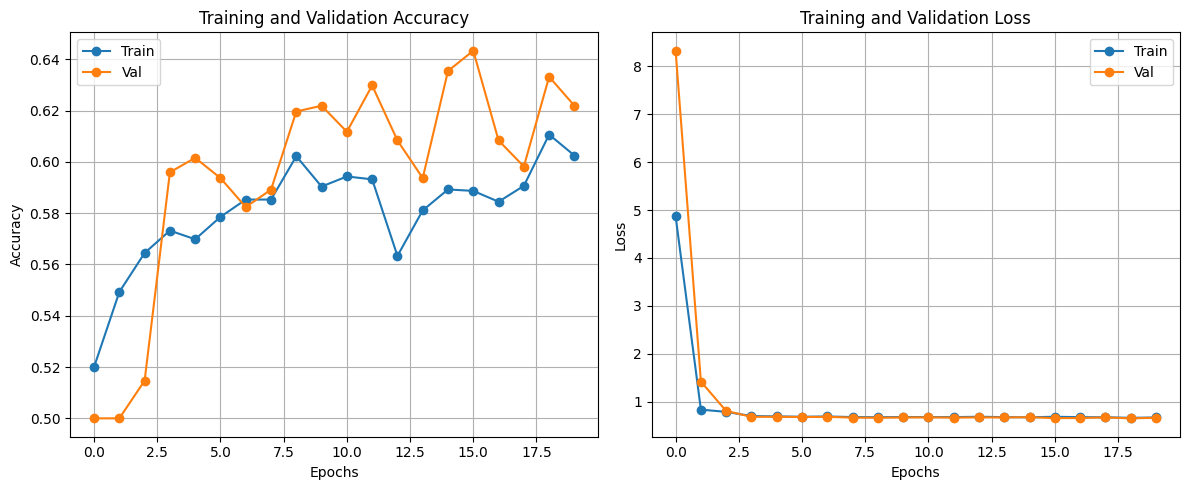

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train', marker='o')
plt.plot(history.history['val_accuracy'], label='Val', marker='o')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.grid(True); plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train', marker='o')
plt.plot(history.history['val_loss'], label='Val', marker='o')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Final Test Accuracy: {test_acc * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 458s 13s/step - accuracy: 0.6065 - loss: 0.5841

 Final Test Accuracy: 66.16%
